<a href="https://colab.research.google.com/github/TarunNoriya18/Automate-Detection-of-different-emotions-from-textual-feedback-and-comments/blob/main/IntershipProjectIb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automaate detection of different emotion from textual comments and feedbaak


In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 2.8 MB/s eta 0:00:00


In [ ]:
### importing packages
import pandas as pd
import numpy as np


In [ ]:
### Importing Data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import neattext.functions as nfx

In [ ]:
### Load Datasets
ds = pd.read_csv("Datasets.csv")

In [ ]:
### Preview dataset
ds.head()

,Emotion,Text
0,happy,I suppose I am happy being so ` tiny' ; it mea...
1,happy,Lennox has always truly wanted to fight for th...
2,happy,"He was a professional musician now , still sen..."
3,happy,Holmes is happy having the freedom of the hous...
4,happy,I had problems with tutors trying to encourage...


In [ ]:
### Shape
ds.shape

(2414, 2)

In [ ]:
# datatype
ds.dtypes

Emotion    object
Text       object
dtype: object

In [ ]:
# check for missing values
ds.isnull().sum()

Emotion    0
Text       0
dtype: int64

<Axes: >

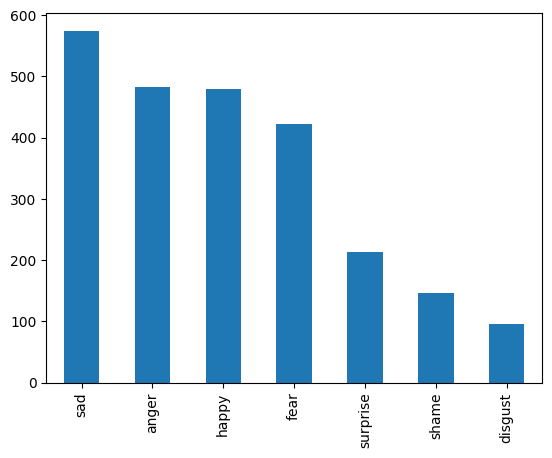

In [ ]:
# Value counts of the Emotions
ds['Emotion'].value_counts().plot(kind='bar')

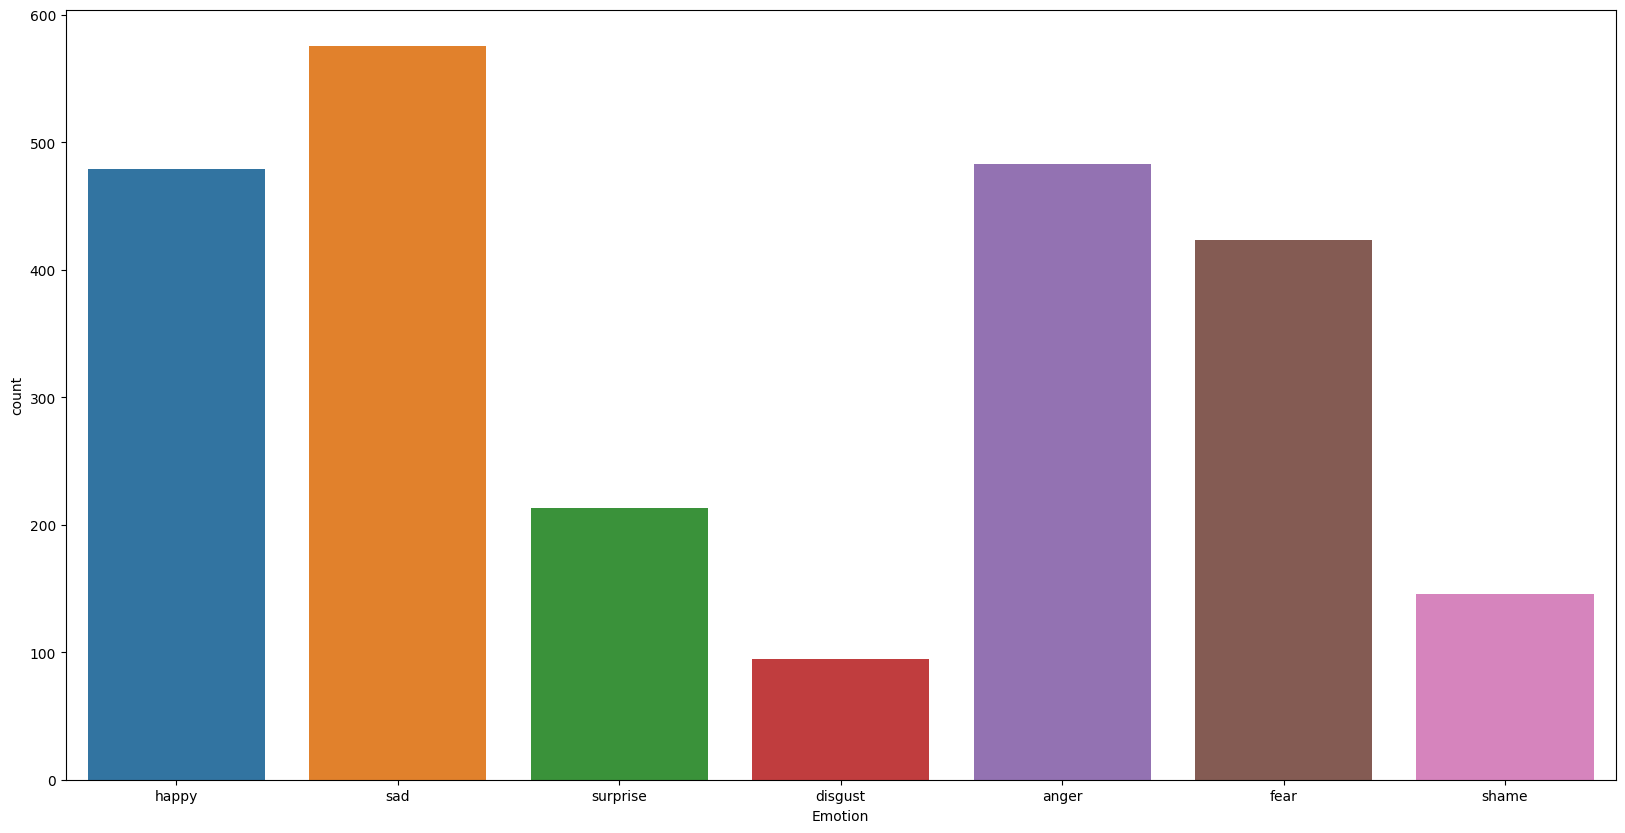

In [ ]:
from seaborn.widgets import plt
# Using Seaborn to plot by new method
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=ds)
plt.show()

In [ ]:
### Sentimental Analysis
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob= TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result


In [ ]:
# Text fxn
get_sentiment("I love coding")

'Positive'

In [ ]:
ds['sentiment'] = ds['Text'].apply(get_sentiment)

In [ ]:
ds.head()

,Emotion,Text,sentiment
0,happy,I suppose I am happy being so ` tiny' ; it mea...,Positive
1,happy,Lennox has always truly wanted to fight for th...,Positive
2,happy,"He was a professional musician now , still sen...",Positive
3,happy,Holmes is happy having the freedom of the hous...,Positive
4,happy,I had problems with tutors trying to encourage...,Positive


In [ ]:
# compare our emotion vs sentiment
ds.groupby(['Emotion','sentiment']).size()

Emotion   sentiment
anger     Negative     192
          Neutral      175
          Positive     116
disgust   Negative      34
          Neutral       33
          Positive      28
fear      Negative     117
          Neutral      158
          Positive     148
happy     Negative      67
          Neutral       97
          Positive     315
sad       Negative     223
          Neutral      176
          Positive     176
shame     Negative      46
          Neutral       50
          Positive      50
surprise  Negative      51
          Neutral       91
          Positive      71
dtype: int64

<Axes: xlabel='Emotion,sentiment'>

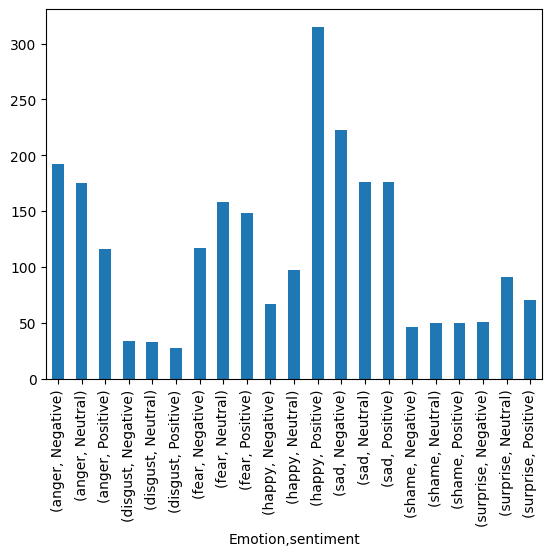

In [ ]:
#first method using matplotlib
# compare our emotion vs sentiment
ds.groupby(['Emotion','sentiment']).size().plot(kind='bar')

In [ ]:
# Using Seaborn
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)>

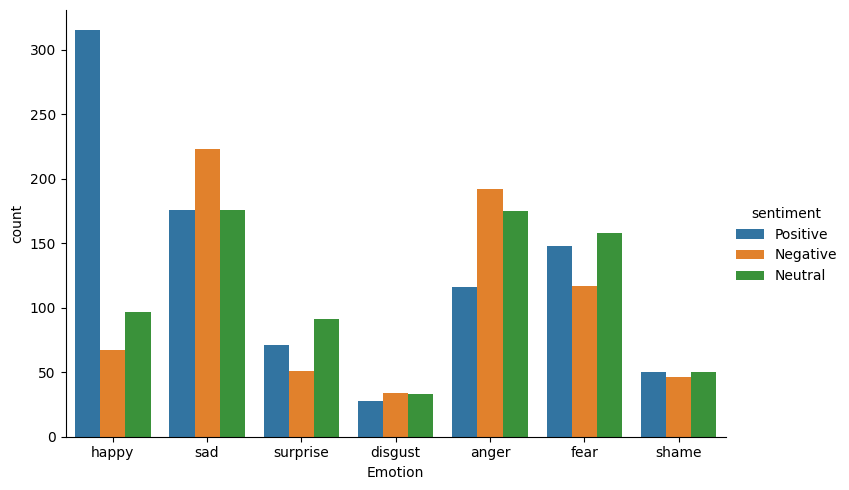

In [ ]:
sns.catplot(x = 'Emotion', hue = 'sentiment', data = ds, kind = 'count', aspect = 1.5)

In [ ]:
### Keyword Extraction
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
ds['Clean_Text'] = ds['Text'].apply(nfx.remove_stopwords)

In [ ]:
ds['Clean_Text'] = ds['Clean_Text'].apply(nfx.remove_userhandles)

In [ ]:
ds['Clean_Text'] = ds['Clean_Text'].apply(nfx.remove_punctuations)

In [ ]:
ds[['Text', 'Clean_Text']]

,Text,Clean_Text
0,I suppose I am happy being so ` tiny' ; it mea...,suppose happy tiny means able surprise peopl...
1,Lennox has always truly wanted to fight for th...,Lennox truly wanted fight world title happy ta...
2,"He was a professional musician now , still sen...",professional musician sensitive happy loved
3,Holmes is happy having the freedom of the hous...,Holmes happy freedom house
4,I had problems with tutors trying to encourage...,problems tutors trying encourage diversity wor...
...,...,...
2409,He gets real humiliated and has to leave .,gets real humiliated leave
2410,They aimed for higher status jobs and felt hum...,aimed higher status jobs felt humiliated unemp...
2411,He cursed his lack of self-control ; he knew t...,cursed lack selfcontrol knew old biddies seen...
2412,Sometimes I've thought I 'll never forget wha...,Ive thought ll forget happened comes feel guil...


In [ ]:
### Keyword Extraction
from collections import Counter

In [ ]:
def extract_keywords(text,num = 50):
  tokens = [ tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
# List of Emotions
emotion_list = ds['Emotion'].unique().tolist()

In [ ]:
emotion_list

['happy', 'sad', 'surprise', 'disgust', 'anger', 'fear', 'shame']

In [ ]:
sad_list = ds[ds['Emotion'] == 'sad']['Clean_Text'].tolist()

In [ ]:
sad_docx = ' '.join(sad_list)

In [ ]:
sad_docx

'sad hear right hon Friend Minister Agriculture  Fisheries Food prepared sit negotiations months  sad wants like  Denning family feel sad  Sharpness thriving  ll busy port  makes sad think growing   m sad folded  s come good time   tells   desperately sad scheme come fruition glad bring jobs area   sad afforded welcome given Beirut hostages   told deeply moved audience AGM month  sad   m particularly sad mother nt opportunity buy MC  s possible sad babies children  accept fact wo nt  Anne sad death Misses Dolan happening dwell  sad departure  truth Mr Wolski sad  wish stay Zoo longer  sad missing forthcoming whiskies  sad slightly amused read recent letter reader skilled worker offered 3 hour   Madam Speaker  know great sadness news  grandparents sadness losing gaining grandchildren  saddened article uses spurious connection dialect poverty means attacking English teaching country  John Parsons Nice saddened world 1 humbled comeback attempt age 35 saddened learn people  conference fail

In [ ]:
## Extract Keywords
keyword_sad = extract_keywords(sad_docx)

In [ ]:
keyword_sad

{'s': 96,
 'sad': 59,
 'miserable': 49,
 'felt': 44,
 'depressed': 42,
 'grief': 42,
 'face': 41,
 'anguish': 38,
 'despair': 35,
 'sorrow': 34,
 'said': 33,
 'nt': 30,
 'looked': 28,
 'despondent': 24,
 'heartbroken': 23,
 'feel': 21,
 ':': 21,
 'time': 20,
 'despondency': 19,
 'eyes': 19,
 'people': 18,
 'downcast': 18,
 'devastated': 17,
 'mournful': 16,
 'like': 15,
 'man': 14,
 'anguished': 14,
 'mother': 13,
 'sadness': 13,
 'dejected': 13,
 'desolate': 13,
 'deep': 13,
 'inconsolable': 13,
 'look': 13,
 'expression': 13,
 'disconsolate': 13,
 'sorrowful': 13,
 'great': 12,
 'life': 12,
 'mood': 12,
 'family': 11,
 'think': 11,
 'death': 11,
 'feeling': 11,
 'glum': 11,
 'day': 11,
 'voice': 11,
 'looking': 11,
 'little': 11,
 'thought': 10}

In [ ]:
# plot
def plot_most_common_words(mydict, emotion_name):
  ds_01 = pd.DataFrame(mydict.items(),columns = ['token', 'count'])
  plt.figure(figsize = (25,15))
  plt.title("Plot of {} - Most Common Keywords".format(emotion_name))
  sns.barplot(x ='token', y = 'count', data = ds_01)
  plt.xticks(rotation = 45)
  plt.show()

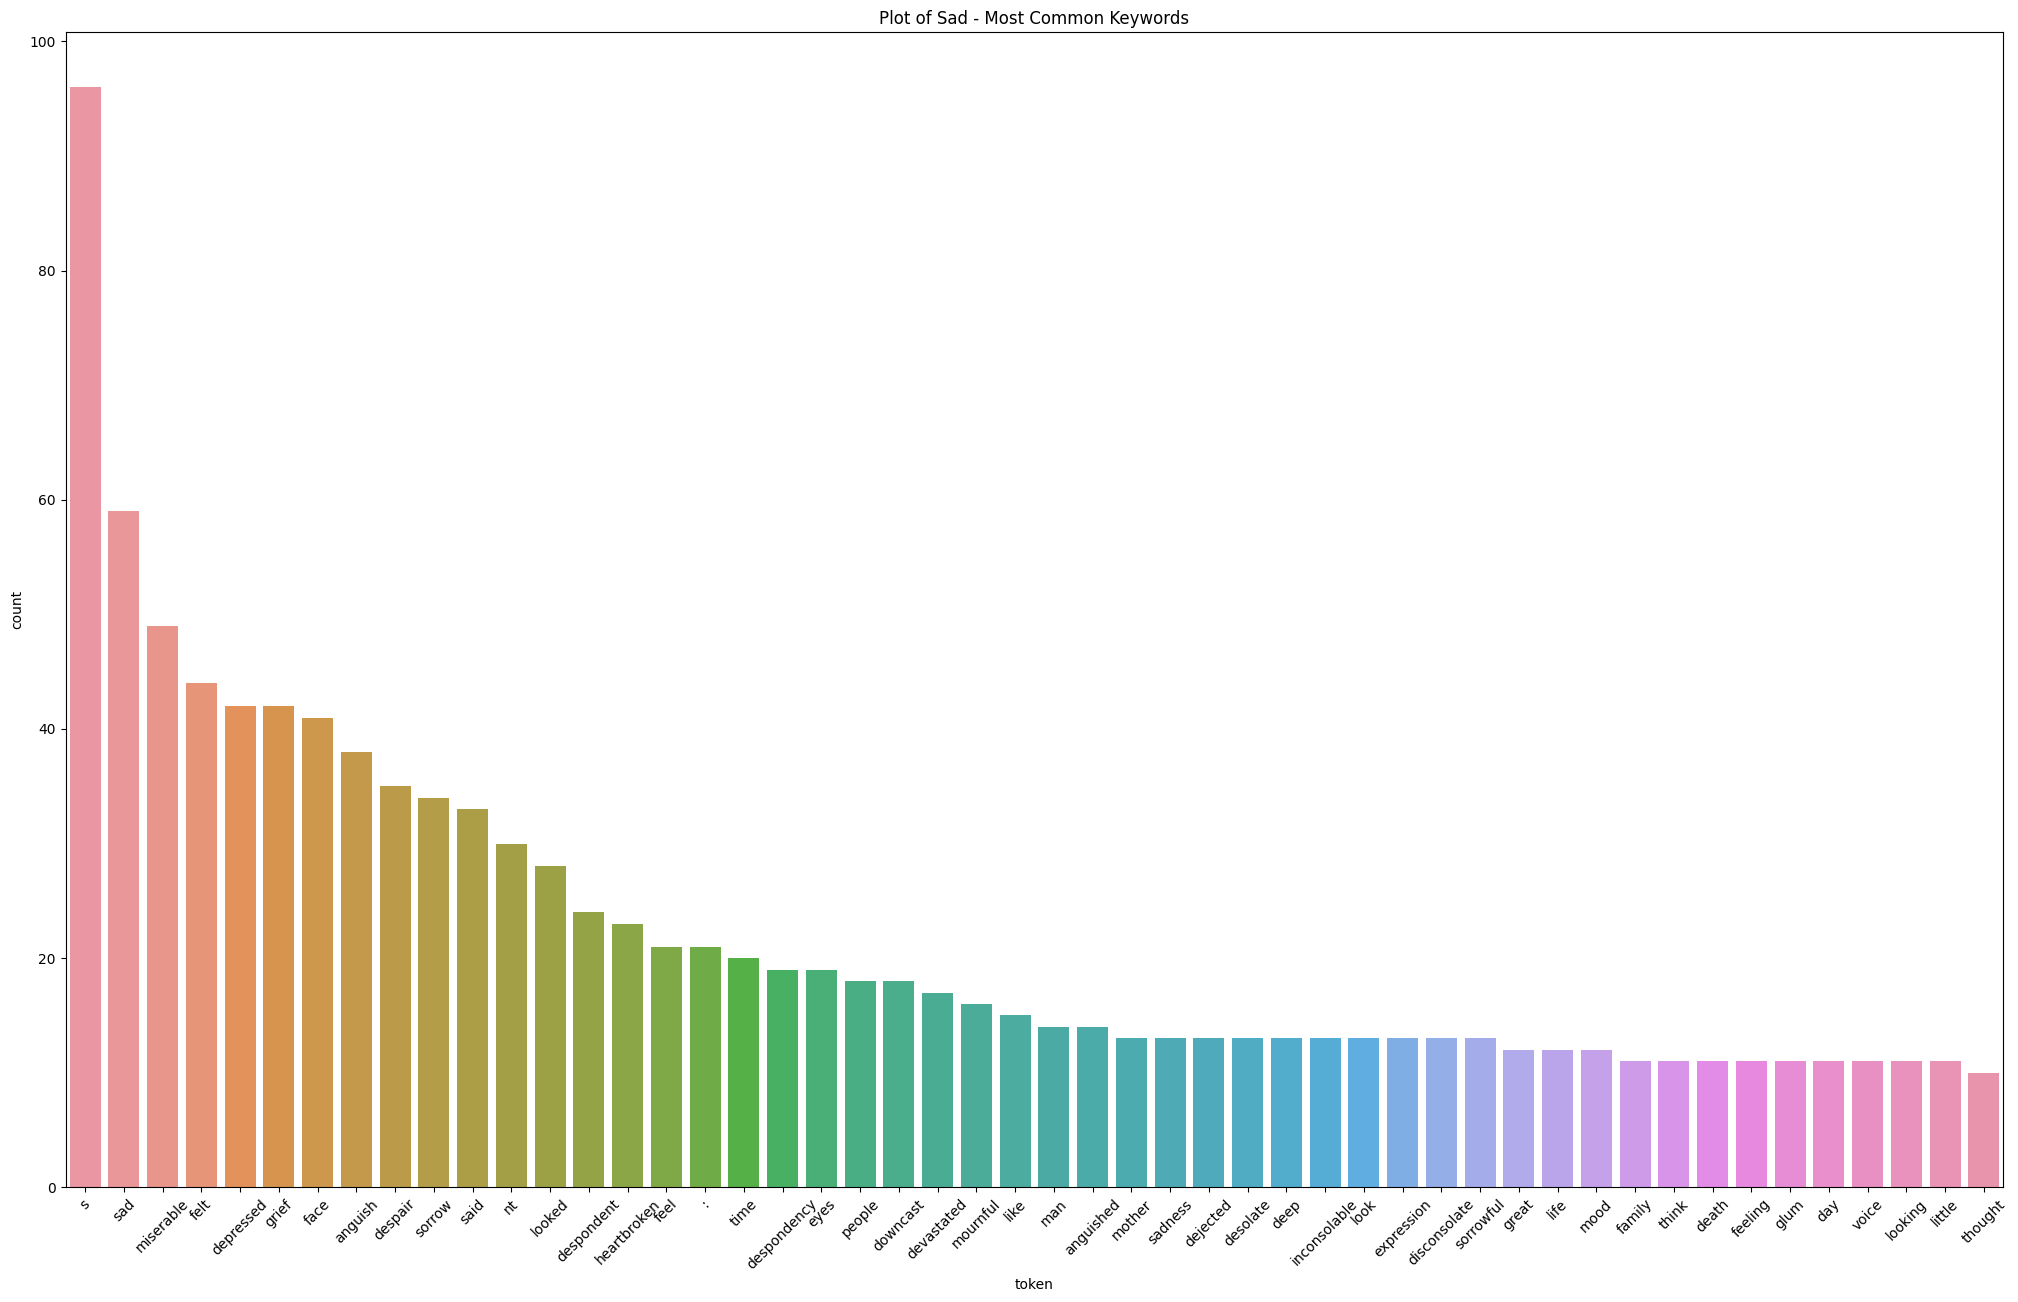

In [ ]:
plot_most_common_words(keyword_sad, "Sad")

In [ ]:
# Word Cloud
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize = (25,15))
  plt.imshow(mywordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

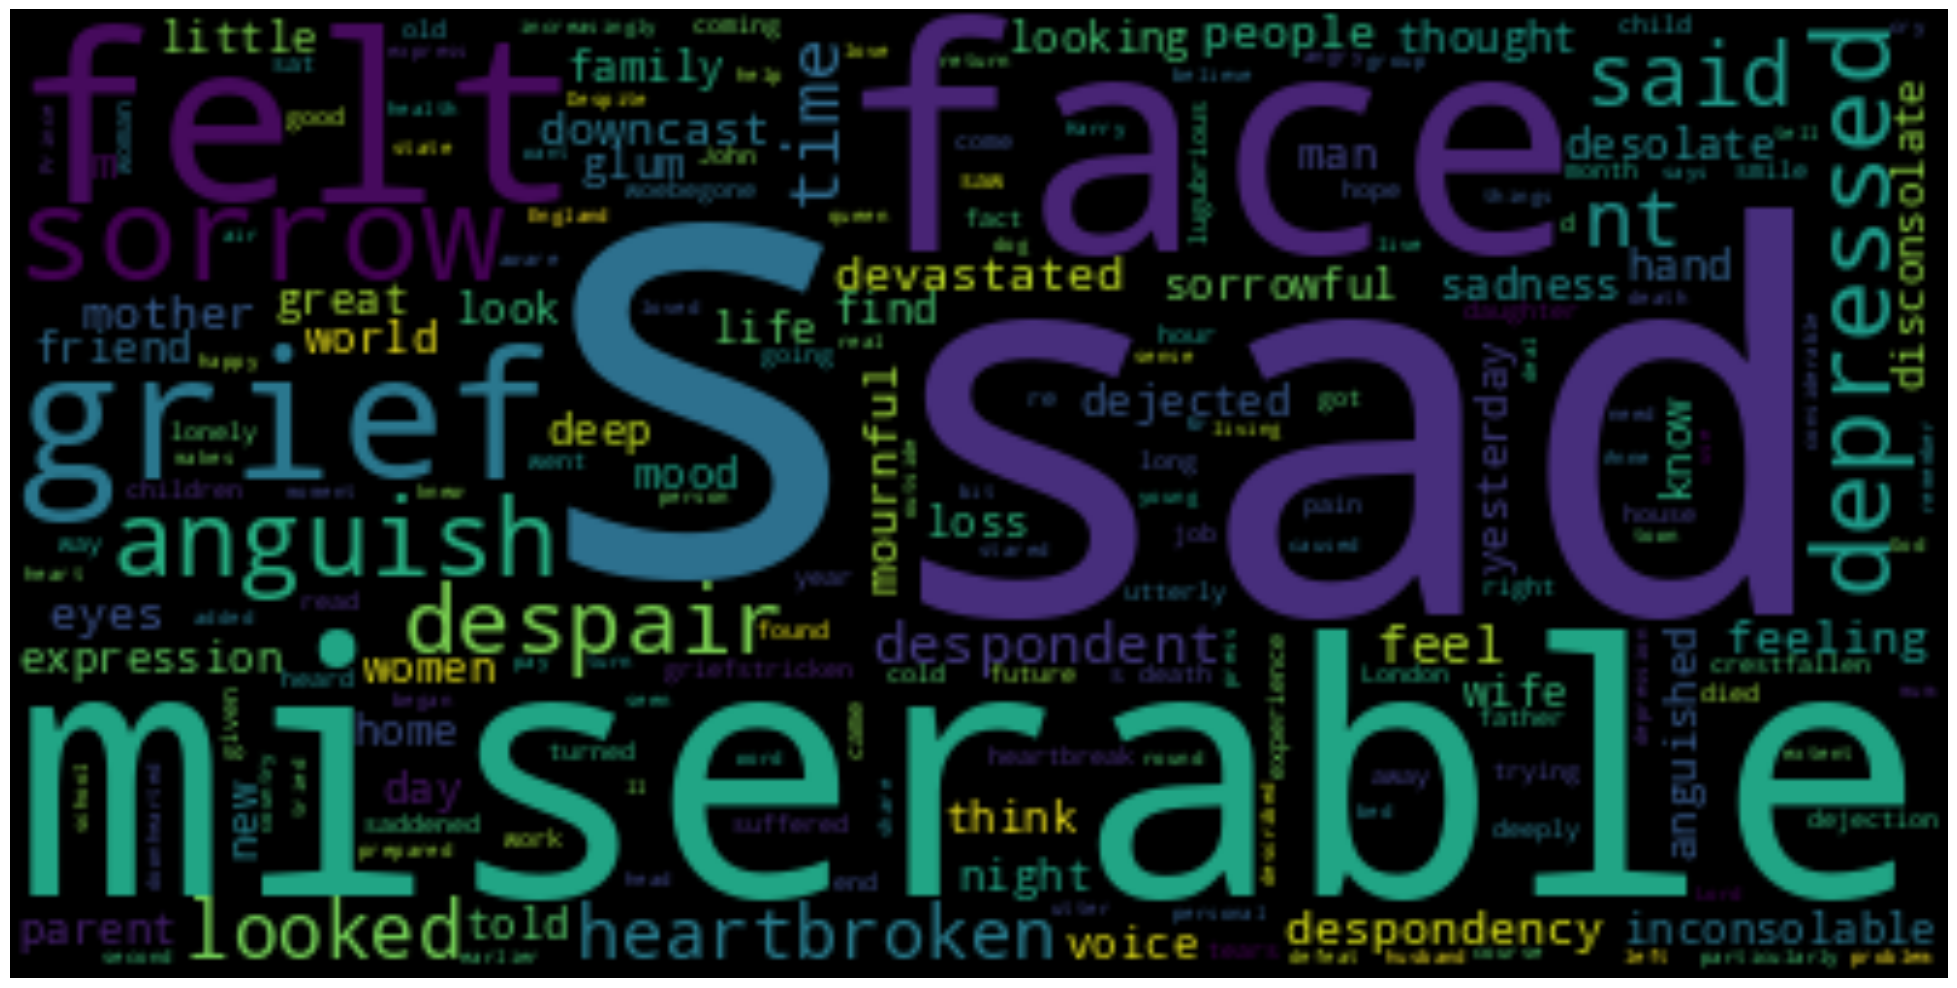

In [ ]:
plot_wordcloud(sad_docx)

In [ ]:
## Load ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [ ]:
#Split our Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Build Features from our text
Xfeatures = ds['Clean_Text']
ylabels = ds['Emotion']

In [ ]:
Xfeatures

0       suppose happy  tiny  means able surprise peopl...
1       Lennox truly wanted fight world title happy ta...
2           professional musician  sensitive happy loved 
3                             Holmes happy freedom house 
4       problems tutors trying encourage diversity wor...
                              ...                        
2409                          gets real humiliated leave 
2410    aimed higher status jobs felt humiliated unemp...
2411    cursed lack selfcontrol  knew old biddies seen...
2412    Ive thought ll forget happened comes feel guil...
2413    GRAHAM TAYLOR defy fury humiliated nation risk...
Name: Clean_Text, Length: 2414, dtype: object

In [ ]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [ ]:
# Get Features by name
cv.get_feature_names_out()

array(['10', '100000', '1030', ..., 'zombie', 'zoo', 'zzap'], dtype=object)

In [ ]:
# To Dense Array
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Split datasert
X_train,X_test, y_train,y_test = train_test_split(X,ylabels,test_size = 0.3,random_state = 42)

In [ ]:
# Build model
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Accuracy
# Method 1
nv_model.score(X_test,y_test)

0.8551724137931035

In [ ]:
# Predictins
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['anger', 'sad', 'fear', 'surprise', 'happy', 'fear', 'sad',
       'anger', 'sad', 'surprise', 'fear', 'fear', 'anger', 'sad', 'sad',
       'sad', 'sad', 'anger', 'anger', 'anger', 'fear', 'happy', 'fear',
       'fear', 'surprise', 'sad', 'happy', 'disgust', 'happy', 'fear',
       'happy', 'sad', 'anger', 'happy', 'fear', 'sad', 'anger', 'fear',
       'anger', 'sad', 'happy', 'surprise', 'happy', 'sad', 'anger',
       'sad', 'sad', 'sad', 'anger', 'sad', 'sad', 'sad', 'shame', 'sad',
       'fear', 'shame', 'fear', 'happy', 'anger', 'sad', 'anger', 'anger',
       'fear', 'anger', 'fear', 'happy', 'anger', 'anger', 'fear',
       'happy', 'surprise', 'surprise', 'anger', 'fear', 'happy', 'sad',
       'sad', 'shame', 'sad', 'happy', 'sad', 'surprise', 'sad', 'anger',
       'surprise', 'happy', 'disgust', 'sad', 'happy', 'fear', 'happy',
       'fear', 'happy', 'happy', 'shame', 'anger', 'fear', 'sad', 'fear',
       'happy', 'anger', 'sad', 'anger', 'anger', 'anger', 'happ

# **Make a Single Prediction**


*   Vectorized our Text
*   Applied our Model



In [ ]:
sample_text = ['Feels low wihtout you']

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
# Make Predicition
nv_model.predict(vect)

array(['anger'], dtype='<U8')

In [ ]:
# Check for the Prediction Probablity(percentage)/Confidence score
nv_model.predict_proba(vect)

array([[0.31088576, 0.0160329 , 0.29436572, 0.2074485 , 0.05460654,
        0.04998577, 0.06667481]])

In [ ]:
# Get all the class of our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'happy', 'sad', 'shame', 'surprise'],
      dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.3108857579803747

In [ ]:
def predict_emotion(sample_text,model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
  print("prediction:{}  Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
  return pred_percentage_for_all

In [ ]:
predict_emotion(["I muffled"],nv_model)

prediction:anger  Prediction Score:0.3185334106417321


{'anger': 0.3185334106417321,
 'disgust': 0.03980195532378398,
 'fear': 0.15065153597196485,
 'happy': 0.16342959644686156,
 'sad': 0.17694897746159163,
 'shame': 0.06268002468481325,
 'surprise': 0.0879544994692523}

In [ ]:
predict_emotion(sample_text,nv_model)

prediction:anger  Prediction Score:0.3108857579803747


{'anger': 0.3108857579803747,
 'disgust': 0.016032904928456278,
 'fear': 0.29436572165307945,
 'happy': 0.20744850168899068,
 'sad': 0.05460654229514467,
 'shame': 0.04998576594775227,
 'surprise': 0.06667480550620206}

In [ ]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_for_nv)

array([[136,   0,   0,   8,  11,   0,   1],
       [  2,  11,   2,   5,   6,   1,   2],
       [  1,   0, 101,   5,   7,   0,   0],
       [  2,   0,   4, 122,   6,   1,   0],
       [  4,   0,   7,   3, 177,   0,   1],
       [  3,   0,   0,   4,   8,  26,   0],
       [  1,   0,   3,   2,   4,   1,  47]])

In [ ]:
import joblib

In [ ]:
model_file = open("emotion_classifier_nv_model_04_march_2023.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [ ]:
### Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_test,y_test)

LogisticRegression()

In [ ]:
# Accuracy
lr_model.score(X_test,y_test)

0.9986206896551724

In [ ]:
# Single Predict
predict_emotion(sample_text,lr_model)

prediction:sad  Prediction Score:0.30114072189121527


{'anger': 0.19259889419886755,
 'disgust': 0.04391352095062782,
 'fear': 0.17605434493810473,
 'happy': 0.16327806317107726,
 'sad': 0.30114072189121527,
 'shame': 0.04154002050088685,
 'surprise': 0.08147443434922057}

In [ ]:
# Interpret Model
!pip install eli5
import eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=21b517f64b7115bf54b2ca9a0539e79dfb241790319e5f2624cb07d6f3e64f32
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
# Show the Weighs for each Class/Labels
eli5.show_weights(lr_model,top=20)

In [ ]:
class_names = ylabels.unique().tolist()

In [ ]:
feature_names = cv.get_feature_names_out()

In [ ]:
eli5.show_weights(lr_model,feature_names = feature_names,target_names = class_names)

In [ ]:
?eli5.show_weights